In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display  import Audio
from sklearn import preprocessing
import seaborn as sns
import missingno as msno

In [2]:
ruta_mg = '../data/audio/mg'
pistas_mg = os.listdir(ruta_mg)
ruta_no = '../data/audio/no'
pistas_no = os.listdir(ruta_no)
viz_path = '../user_viz/'

pistas_unif = pistas_mg + pistas_no
etquetas = ['mg', 'no']


In [3]:
print('# de pistas que me gustan: ', len(pistas_mg))
print('# de pistas que no me gustan: ', len(pistas_no))
print('# total de pistas:', len(pistas_unif))

# de pistas que me gustan:  692
# de pistas que no me gustan:  481
# total de pistas: 1173


# Analizando una canción de cada categoría

In [4]:
a = randint(0, 691)
b = randint(0, 480)

In [5]:
samples_mg, sr_mg = librosa.load(ruta_mg + '/' + pistas_mg[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_no, sr_no= librosa.load(ruta_no + '/' + pistas_no[b], sr = None, mono = True, offset = 0.0, duration = None)

In [6]:


print('Tamaño de muestreo (samples) mg: ', len(samples_mg))
print('Tasa de muestreo (sampling rate) mg: ', sr_mg)
print('Tamaño de muestreo (samples) no: ', len(samples_no))
print('Tasa de muestreo (sampling rate) no: ', sr_no)




Tamaño de muestreo (samples) mg:  7056623
Tasa de muestreo (sampling rate) mg:  44100
Tamaño de muestreo (samples) no:  3746184
Tasa de muestreo (sampling rate) no:  44100


# Pistas cargadas

In [7]:
pistas_mg[a]

'crop_Deorro ft Adrian Delgado  DyCy   Perdóname.mp3'

In [8]:
pistas_no[b]

'crop_009 ¿Y Qué Tal Si Funciona, - Yuridia ft. Banda MS.mp3'

In [9]:
Audio(ruta_mg + '/' + pistas_mg[a])

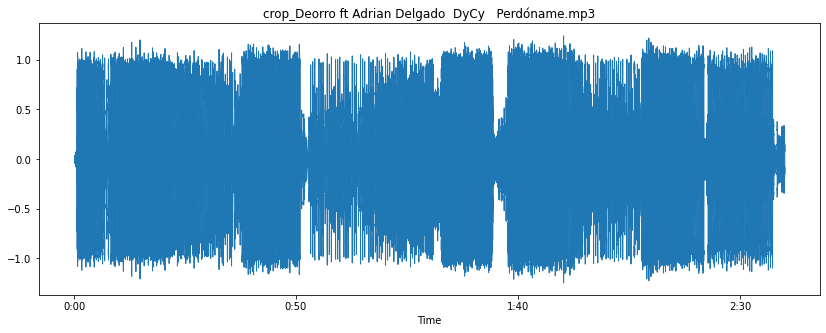

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples_mg, sr = sr_mg)
plt.title(pistas_mg[a])
plt.savefig(viz_path + 'main_signal.png')

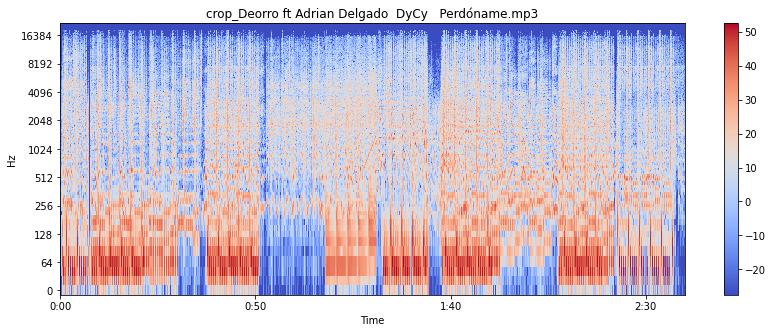

In [31]:
X = librosa.stft(samples_mg)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_mg, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_mg[a])
plt.savefig(viz_path + "perdóname.png")

In [12]:
print(pistas_no[b])

crop_009 ¿Y Qué Tal Si Funciona, - Yuridia ft. Banda MS.mp3


In [13]:
Audio(ruta_no + '/' + pistas_no[b])

Text(0.5, 1.0, 'crop_009 ¿Y Qué Tal Si Funciona, - Yuridia ft. Banda MS.mp3')

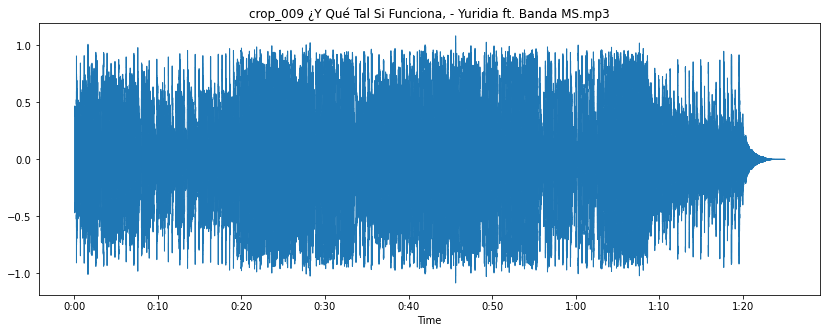

In [14]:

plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples_no, sr = sr_no)
plt.title(pistas_no[b])


Text(0.5, 1.0, 'crop_009 ¿Y Qué Tal Si Funciona, - Yuridia ft. Banda MS.mp3')

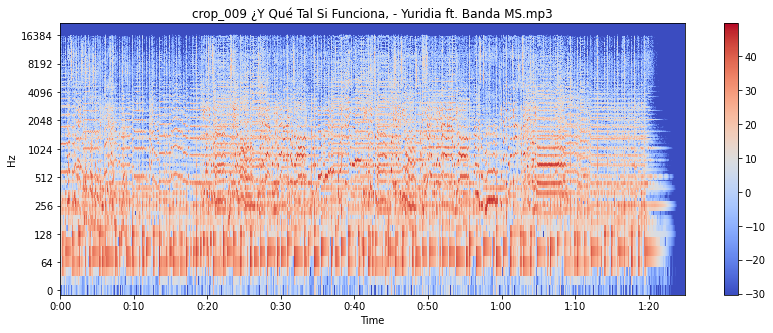

In [15]:
X = librosa.stft(samples_no)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_no, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_no[b])

# Característica espectrales del audio

- Zero crossing rate: tasa de cambios de signo a través de una señal, usado principalemente para el análisis de patrines en percusiones.
- Spectral centroid: Indica en donde está el "centro de masa" (mayor sendidad de muestras) de una pista de audio.
- Spectrall Roll off: La medida de la forma de la señal, representa la frecuencia de la señal debajo de un porcentaje especifico.
- Spectral Bandwidth, ancho de banda espectral de la señal de audio.
- Mel Frequency cepstral coeficients: los MFCC de una señal son sunconjuntos de características que describen de manera concisa la forma general del espectro. Esta técnica se usa para el análisis de la voz humana.
- Chroma frequencies: Representación de los 12 semitonos que existen en la octava musical #### Características rítmicas.
- Tempograma: Estimación de los BPM de cada pista.


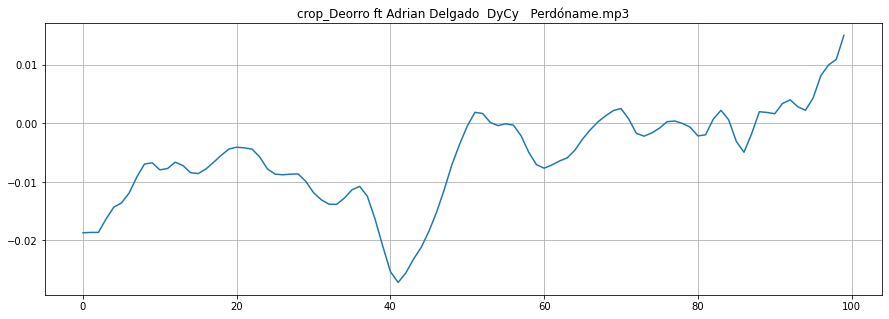

In [16]:
#Zero crossing rate
n0 = 9000
n1 = 9100
plt.figure(figsize=(15, 5))
plt.plot(samples_mg[n0:n1])
plt.grid()
plt.title(pistas_mg[a])
plt.savefig(viz_path+'zcr_ejemplo.png')

In [17]:
zero_crossings= librosa.zero_crossings(samples_mg[n0:n1], pad=False)
print(np.mean(zero_crossings))
print(sum(zero_crossings))

samples_mg

0.09
9


array([0.        , 0.        , 0.        , ..., 0.00508105, 0.00796555,
       0.01326552], dtype=float32)

In [18]:
#spectral centroid, calcula el crentoide espectral para cada cuadro de la señal
spectral_centroids = librosa.feature.spectral_centroid(samples_mg, sr=sr_mg)[0]
spectral_centroids.shape

/var/folders/kd/10gszx0j7yb750_lw1x1n3t00000gn/T/ipykernel_6769/1650659225.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.00508105 0.00796555 0.01326552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(samples_mg, sr=sr_mg)[0]


(13783,)

In [19]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [20]:
def normalize(x, axis = 0):
    return preprocessing.minmax_scale(x, axis = axis)

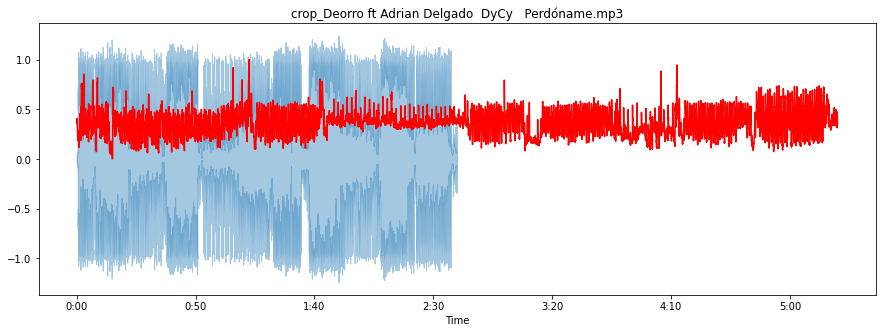

In [21]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(samples_mg, sr=sr_mg, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title(pistas_mg[a])
plt.savefig(viz_path + 'centroides_exprectrales.png')

/var/folders/kd/10gszx0j7yb750_lw1x1n3t00000gn/T/ipykernel_6769/378453625.py:2: FutureWarning: Pass y=[0.01       0.01       0.01       ... 0.01508105 0.01796555 0.02326552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spr = librosa.feature.spectral_rolloff(samples_mg+0.01, sr = sr_mg)[0]


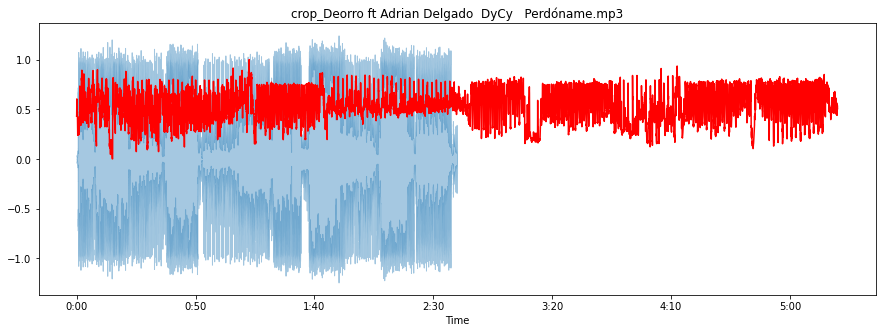

In [22]:
#spectral rolloff
spr = librosa.feature.spectral_rolloff(samples_mg+0.01, sr = sr_mg)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveshow(samples_mg, sr = sr_mg, alpha = 0.4)
plt.plot(t, normalize(spr), color = 'r')
plt.title(pistas_mg[a])
plt.savefig(viz_path + 'roll_off.png')

In [24]:
#MFCC
mfccs = librosa.feature.mfcc(samples_mg, sr = sr_mg)
mfccs.shape

/var/folders/kd/10gszx0j7yb750_lw1x1n3t00000gn/T/ipykernel_6769/3972829385.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.00508105 0.00796555 0.01326552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(samples_mg, sr = sr_mg)


(20, 13783)

In [25]:
#20 MFCC en 5,171 cuadros

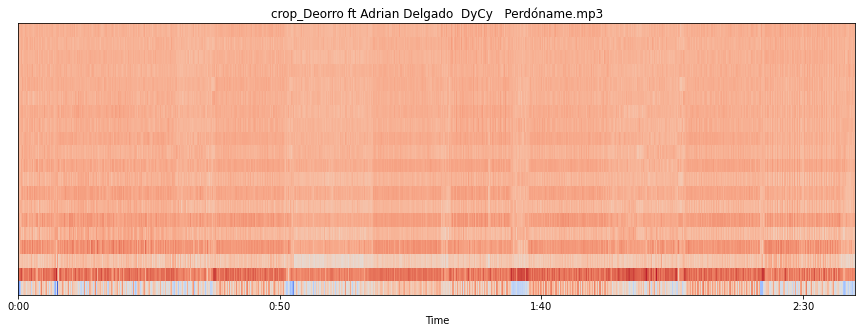

In [26]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr_mg, x_axis='time')
plt.title(pistas_mg[a])
plt.savefig(viz_path + 'MFCC.png')

/var/folders/kd/10gszx0j7yb750_lw1x1n3t00000gn/T/ipykernel_6769/3222876429.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.00508105 0.00796555 0.01326552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  cromatica = librosa.feature.chroma_stft(samples_mg, sr=sr_mg, hop_length=salto)


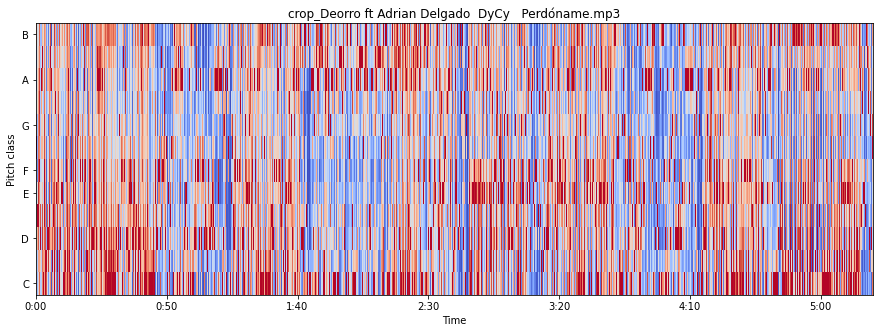

In [27]:
#Chroma frequencies: representación de la escala cromática en 12 semitonos
salto = 512
cromatica = librosa.feature.chroma_stft(samples_mg, sr=sr_mg, hop_length=salto)
plt.figure(figsize=(15, 5))
librosa.display.specshow(cromatica, x_axis='time', y_axis='chroma', hop_length=salto, cmap='coolwarm')
plt.title(pistas_mg[a])
plt.savefig(viz_path + 'cromatica.png')

In [28]:
%%time
#Temmpograma
hop_length = 512
env = librosa.onset.onset_strength(y = samples_mg, sr = sr_mg, hop_length = hop_length)
tempograma = librosa.feature.tempogram(onset_envelope = env, sr = sr_mg, hop_length = hop_length)

auto_c = librosa.autocorrelate(env, max_size = tempograma.shape[0])
auto_c = librosa.util.normalize(auto_c)

#mostrar los "beats"
tempo = librosa.beat.tempo(onset_envelope = env, sr = sr_mg, hop_length = hop_length)[0]
print(tempo)
print(auto_c.shape)
print(np.mean(auto_c))

129.19921875
(384,)
0.452728006674431
CPU times: user 3.56 s, sys: 671 ms, total: 4.23 s
Wall time: 2.06 s


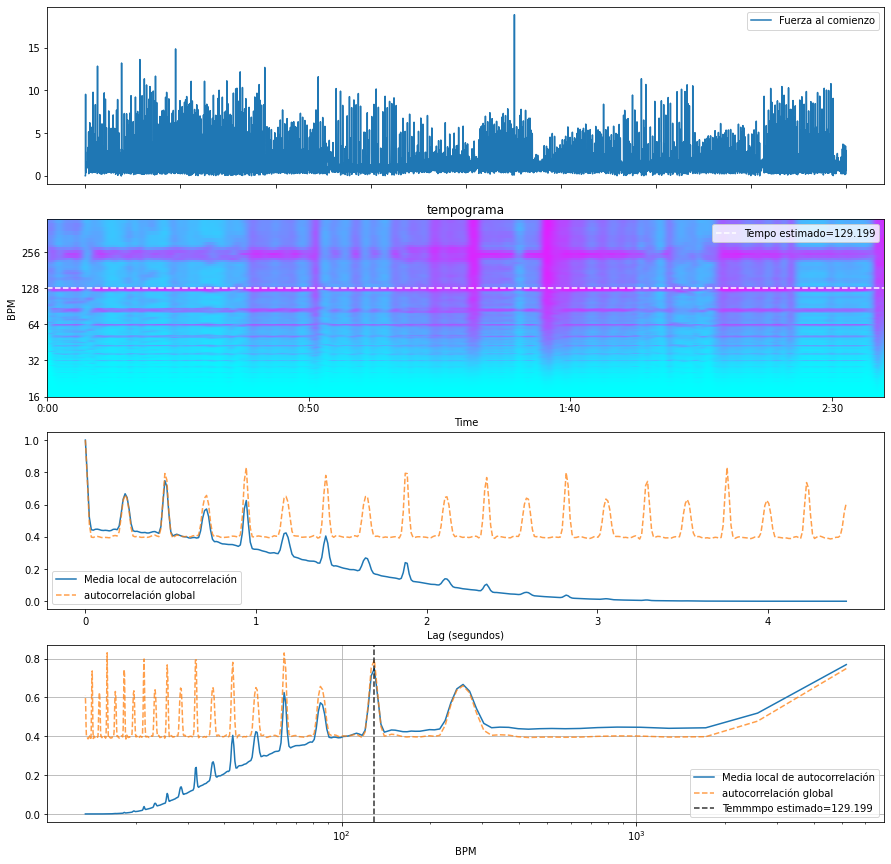

In [29]:
fig, ax = plt.subplots(nrows=4, figsize=(15, 15))
tiempos = librosa.times_like(env, sr=sr_mg, hop_length=hop_length)
ax[0].plot(tiempos, env, label='Fuerza al comienzo')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempograma, sr=sr_mg, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool',ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='tempograma')
x = np.linspace(0, tempograma.shape[0] * float(hop_length) / sr_mg,num=tempograma.shape[0])
ax[2].plot(x, np.mean(tempograma, axis=1), label='Media local de autocorrelación')
ax[2].plot(x, auto_c, '--', alpha=0.75, label='autocorrelación global')
ax[2].set(xlabel='Lag (segundos)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempograma.shape[0], hop_length=hop_length, sr=sr_mg)
ax[3].semilogx(freqs[1:], np.mean(tempograma[1:], axis=1),label='Media local de autocorrelación')
ax[3].semilogx(freqs[1:], auto_c[1:], '--', alpha=0.75,label='autocorrelación global')
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,label='Temmmpo estimado={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

plt.savefig(viz_path + 'tempo_in_musica.png')

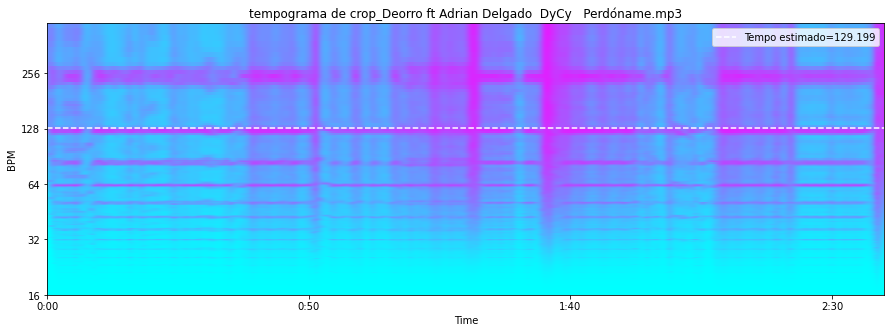

In [30]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(tempograma, sr=sr_mg, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool')
plt.axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
plt.legend(loc='upper right')
plt.title('tempograma de ' + pistas_mg[a])
plt.savefig(viz_path + f'tempograma_{pistas_mg[a]}.png')